# Exploratory data Analysis
#### Kaggle Forest Cover Competition

## Kaggle's Data Description

[Link to Data page on Kaggle](https://www.kaggle.com/c/forest-cover-type-prediction/data)

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

## Read Data

Read in the test and the training data. Shove that stuff into pandas.

In [1]:
#Imports and reading data and stuff

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Libraries for reading, cleaning and plotting the dataa
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt


# Libraries for models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Read in training (+dev) data 
training_data = []
with open('../data/train.csv', newline='') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in train_data:
        training_data.append(row)
            
# Convert to a numpy array of type int (except for the label row)
training_data = np.array(training_data[1:]).astype(int)   

# Read in test data
testing_data = []
with open('../data/test.csv', newline='') as csvfile:
    test_data = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in test_data:
        testing_data.append(row)

# The testing file is huge so only read in max_test_data
# max_test_data = 30001
# test_data = np.array(testing_data[1:max_test_data]).astype(int)        

# The training data is huge, so just read it all. Fuggit!
testing_data = np.array(testing_data[1:]).astype(int) 

In [3]:
#shove it all into a data frame

col_names = (["idx_idx","el_m","asp_deg","slp_deg", "hHyd__", "vHyd__","hRd__","sh9_idx",
              "sh12_idx", "sh15_idx","hFire__","a_1","a_2","a_3","a_4"] + 
              [("s_{:02d}".format(ii+1)) for ii in range(40)] + ["cvr_typ"])
            
df = pd.DataFrame(data=training_data, columns=col_names)

df_test = pd.DataFrame(data=testing_data, columns=col_names[:-1])

display(df.head())

display(df_test.head())


,idx_idx,el_m,asp_deg,slp_deg,hHyd__,vHyd__,hRd__,sh9_idx,sh12_idx,sh15_idx,...,s_32,s_33,s_34,s_35,s_36,s_37,s_38,s_39,s_40,cvr_typ
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


,idx_idx,el_m,asp_deg,slp_deg,hHyd__,vHyd__,hRd__,sh9_idx,sh12_idx,sh15_idx,...,s_31,s_32,s_33,s_34,s_35,s_36,s_37,s_38,s_39,s_40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


## Overall Data - Check for NAs row counts etc

In [4]:
# get NA values

print("There are {} NA values in the training data".format(df.isna().sum().sum()))
print("There are {} NA values in the test data".format(df.isna().sum().sum()))
    # `.isna()` returns a df with bools the first `.sum()` returns series, second is int 
print()
print("There are {} values in the training data".format(df.count()[0]))
print("There are {} values in the test data".format(df_test.count()[0]))

There are 0 NA values in the training data
There are 0 NA values in the test data

There are 15120 values in the training data
There are 565892 values in the test data


In [1]:
#split the aspect into a N/S and E/W unit vector
df["asp_ew"] = np.sin(df["asp_deg"])
df["asp_ns"] = np.cos(df["asp_deg"])

df["asp_ew"]**2 + df["asp_ns"]**2

df.hist(column = "asp_ew",bins=50)
df.hist(column = "asp_ns",bins=50)
df.hist(column = "asp_deg",bins=50)

df_circle = df[["asp_ew","asp_ns"]]
df_circle["jitter"] = np.random.rand(df.shape[0])*.6 +1
df_circle["asp_ew_jit"] = df_circle["asp_ew"] * df_circle["jitter"]
df_circle["asp_ns_jit"] = df_circle["asp_ns"] * df_circle["jitter"]

df_circle.plot.scatter("asp_ew_jit","asp_ns_jit",alpha=0.04)
df_circle.head()

NameError: name 'np' is not defined

## Metric variables

#### Findings

* Should change the aspect degrees column to 2 columns each representing the N/S or E/W component of the associated unit vector
* What would happen if we changed the slope in degrees to the more typical rise/run? I feel like it might smooth out the shape so it isn't as bunched.
* Log the hFire__, hRd__, hHydj__ features? it would pull in some of the extreme values.


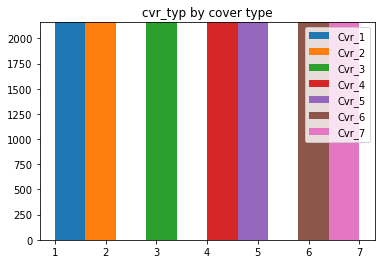

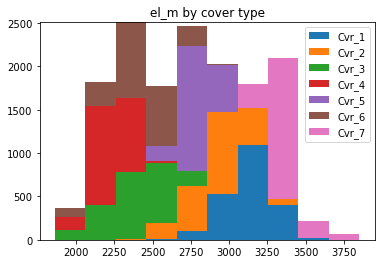

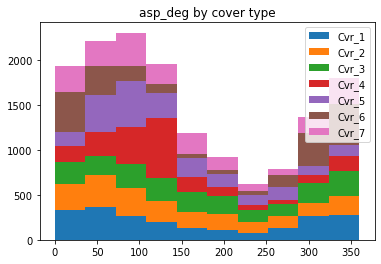

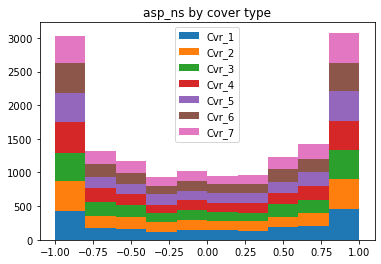

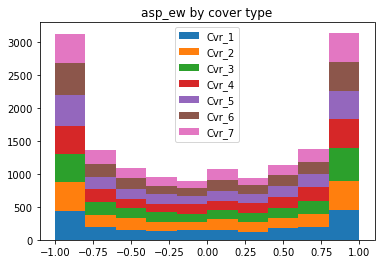

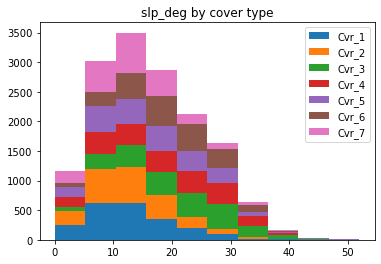

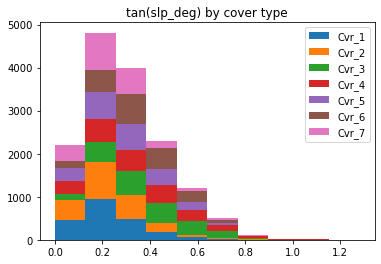

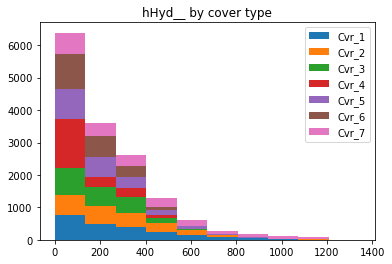

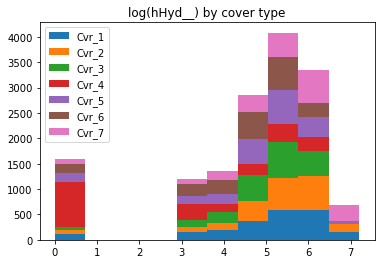

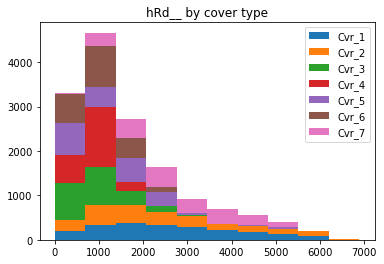

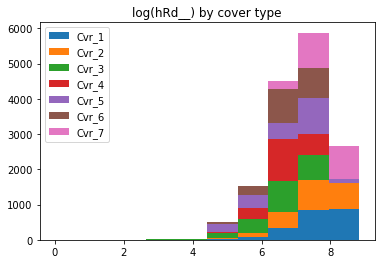

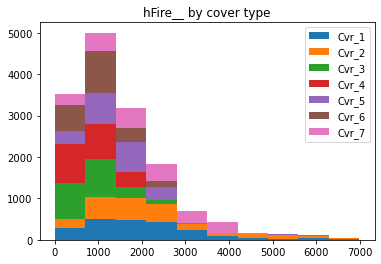

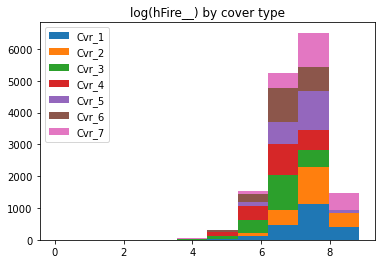

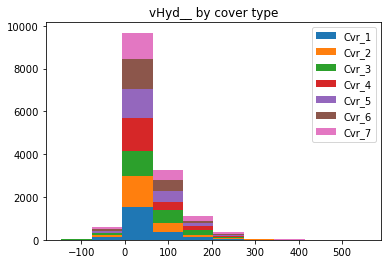

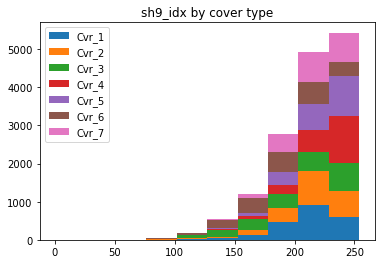

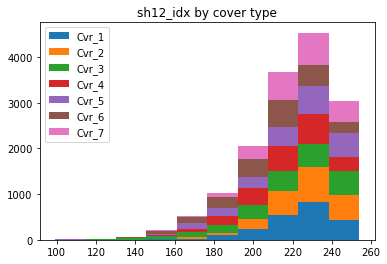

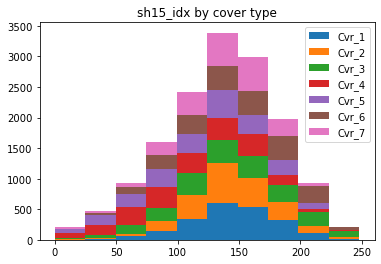

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b1cf6d590>]],
      dtype=object)

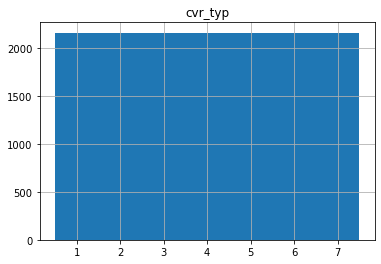

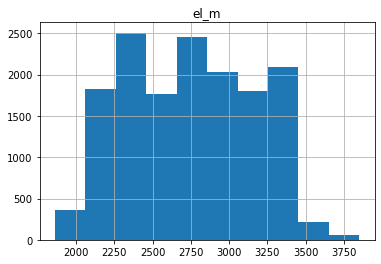

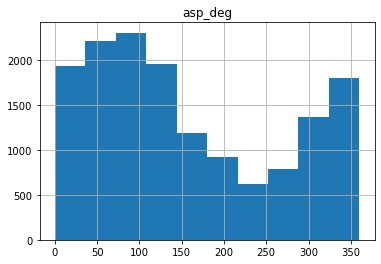

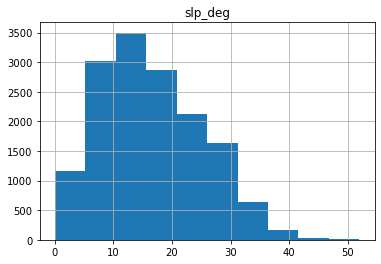

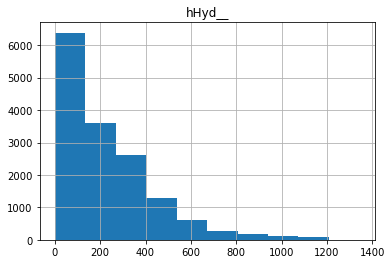

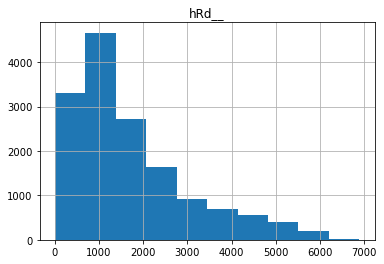

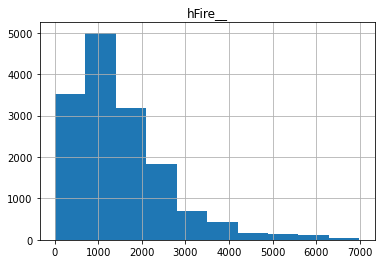

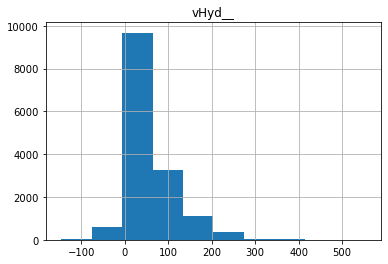

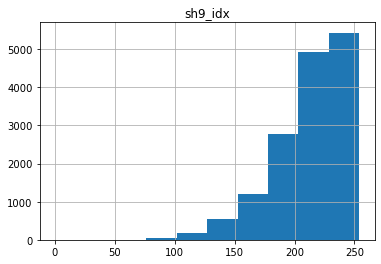

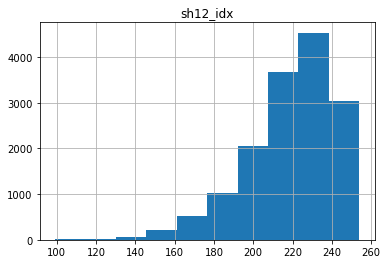

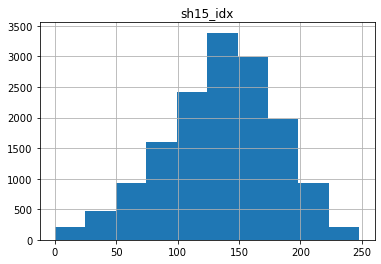

In [84]:
def hist_by_cover(s):
    plt.clf()
    s_bycvr = [df.loc[df["cvr_typ"]==ii+1,s]for ii in range(7)]
    plt.hist(s_bycvr, stacked=True, label=["Cvr_"+str(ii) for ii in range(1,8)])
    plt.legend()
    plt.title(s + " by cover type")
    plt.show()
    
def log_hist_by_cover(s):
    plt.clf()
    s_bycvr = [np.log(df.loc[df["cvr_typ"]==ii+1,s]+1) for ii in range(7)]
    plt.hist(s_bycvr, stacked=True, label=["Cvr_"+str(ii) for ii in range(1,8)])
    plt.legend()
    plt.title("log(" + s + ") by cover type")
    plt.show()
    
def tan_hist_by_cover(s):
    plt.clf()
    s_bycvr = [np.tan(df.loc[df["cvr_typ"]==ii+1,s]*np.pi/180) for ii in range(7)]
    plt.hist(s_bycvr, stacked=True, label=["Cvr_"+str(ii) for ii in range(1,8)])
    plt.legend()
    plt.title("tan(" + s + ") by cover type")
    plt.show()

hist_by_cover("cvr_typ")
hist_by_cover("el_m")
hist_by_cover("asp_deg")
hist_by_cover("asp_ns")
hist_by_cover("asp_ew")
hist_by_cover("slp_deg")
tan_hist_by_cover("slp_deg")
hist_by_cover("hHyd__")
log_hist_by_cover("hHyd__")
hist_by_cover("hRd__")
log_hist_by_cover("hRd__")
hist_by_cover("hFire__")   
log_hist_by_cover("hFire__")
hist_by_cover("vHyd__")
hist_by_cover("sh9_idx")
hist_by_cover("sh12_idx")
hist_by_cover("sh15_idx")

# we have (exactly) equal representation of each cover type
df.hist(column="cvr_typ",bins = [ii+.5 for ii in range(8)])
df.hist(column="el_m")
df.hist(column="asp_deg")
df.hist(column="slp_deg")
df.hist(column=["hHyd__"])
df.hist(column=["hRd__"])
df.hist(column="hFire__")       
df.hist(column=["vHyd__"])
df.hist(column=["sh9_idx"])
df.hist(column="sh12_idx")
df.hist(column="sh15_idx")

In [7]:
# Take a look at the distances. Be suspicious of zeros
df.isin([0]).sum()

idx_idx         0
el_m            0
asp_deg       110
slp_deg         5
hHyd__       1590
vHyd__       1890
hRd__           3
sh9_idx         1
sh12_idx        0
sh15_idx       88
hFire__         2
a_1         11523
a_2         14621
a_3          8771
a_4         10445
s_01        14765
s_02        14497
s_03        14158
s_04        14277
s_05        14955
s_06        14470
s_07        15120
s_08        15119
s_09        15110
s_10        12978
s_11        14714
s_12        14893
s_13        14644
s_14        14951
s_15        15120
s_16        15006
s_17        14508
s_18        15060
s_19        15074
s_20        14981
s_21        15104
s_22        14775
s_23        14363
s_24        14863
s_25        15119
s_26        15066
s_27        15105
s_28        15111
s_29        13829
s_30        14395
s_31        14788
s_32        14430
s_33        14504
s_34        15098
s_35        15018
s_36        15110
s_37        15086
s_38        14392
s_39        14463
s_40        14661
cvr_typ   

## Non-Metric Variables

look at some non-metric variables

#### Findings

* We have almost nothing from area 2 (Neota Wilderness area)

Max Number of areas: 1
Min Number of areas: 1


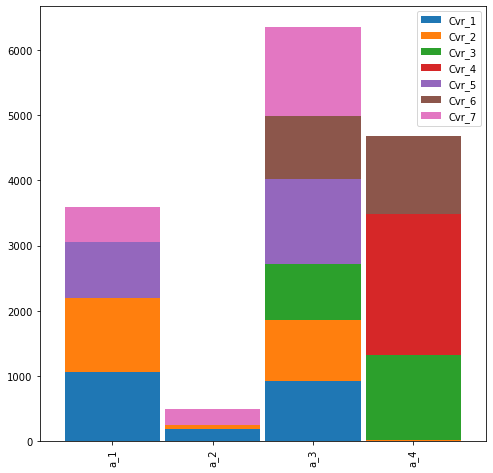

,a_1,a_2,a_3,a_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [26]:
area_df = df[["a_1","a_2","a_3","a_4"]]

# area_df.sum(axis=0).plot.bar()

print("Max Number of areas: {}".format(area_df.sum(axis=1).max()))
print("Min Number of areas: {}".format(area_df.sum(axis=1).min()))

area_counts = pd.DataFrame()
for ii in range(7):
    area_counts["Cvr_"+str(ii+1)] = area_df.loc[df["cvr_typ"]==ii+1].sum(axis=0)
    
area_counts.plot(kind="bar",stacked=True , width = .95, figsize=(8,8))
plt.show()

area_df.head()

The type of soil that occurs least is 's_07'. It occurs 0 times
The type of soil that occurs most is 's_10'. It occurs 2142 times

This is a series of all soil types that occur zero times in the training data
s_07    0
s_15    0
dtype: int64
1
1


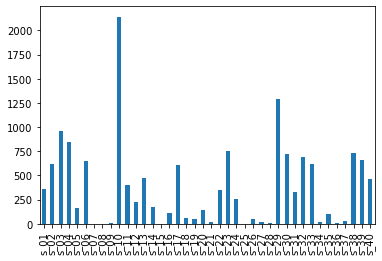

In [9]:
soil_df = df[["s_{:02d}".format(ii+1) for ii in range(40)]]
soil_df.head()

soil_counts = soil_df.sum(axis=0)
soil_counts.plot.bar()
print("The type of soil that occurs least is '{0}'. It occurs {1} times"
      .format(soil_counts.idxmin(),soil_counts.min()))
print("The type of soil that occurs most is '{0}'. It occurs {1} times\n"
      .format(soil_counts.idxmax(),soil_counts.max()))

print("This is a series of all soil types that occur zero times in the training data")
print(soil_counts[soil_counts == 0])

ntypes = soil_df.sum(axis=1)
print(ntypes.max())
print(ntypes.min())


## Soil Type

Right now we have 40 composite types of soil. We are going to re-categorize those into their component parts with a 1 for if a component is present. 0 if they are not present. 

#### Adjustments to the data 

Looking throught the data, we see several areas where the data can be cleaned. The USDA which is the cabinet department which oversees the forest service, publishes a guide on Soil Taxonomy. (https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/home/?cid=nrcs142p2_053577). This guide was very helpful in interpreting several areas where the data can be trimmed down. 

* Filler words
  * "Family / "families" denotes a larger soil group such as Leighcan or Cryaquolls, but these words themselves don't actually carry any information about the group. 
  * "complex" is another word that appears in the docuement but doesn't actually convey any information itself
  * "typic" just means that a soil fits into the most general subgroup of the family listed. In the context of the soil types listed, it is useless because only a few soil types list it, and those that don't list it don't list a more specific subgroup that they are a part of. So, they would also generally be assumed to be typic (see guide to soil taxonomy linked above.)
* Cryaquolis and aquolis types don't exist
  * Looking through the guide to soil taxonomy, there is no such type as cryaquolis and aquolis. The simplest interpretation is that these are typos. Cryaquolls and aquolls do exist (see link above). I will change the words accordingly.
  
#### Possible future work

* See if the "very/extremely" qualifiers on stony should be removed. Do they mean the same thing?
* See if changing "rubbly", "bouldery", "stoney" to all one indicator would be better. Do they all mean the same thing?

In [10]:
#### Analyze frequqncy that imporant types of soil show up ####

import re  #regexes to work with strings
from sklearn.feature_extraction.text import CountVectorizer #count up occurences of words
import numpy as np

# pull in the text of the soil types
with open("soil_raw.txt") as f:
    s_raw = f.read()

# lowercase everything to make it easier to work with
s = s_raw.lower()

# take out punctuation and numbers.
pattern = re.compile(r"[\d\.,-]")
s = pattern.sub(" ",s)

# take out filler words "family","families","complex"
pattern = re.compile(r"(family|families|complex|typic)")
s = pattern.sub(" ",s)

# replace cryaquolis/aquolis (doesn't exist) with cryaquolls/aquolls
pattern = re.compile(r"aquolis")
s = pattern.sub("aquolls",s)

# the "unspecified" row doesn't contain any data
pattern = re.compile(r"unspecified in the usfs soil and elu survey")
s = pattern.sub(" ",s)

#replace the space in words separated by a single space with an underscore
pattern = re.compile(r"(\w+) (\w+)")
s = pattern.sub(r"\1_\2",s)



### COUNT AND TRANSFORM THE DATA ###
cv = CountVectorizer()
# create the counts matrix based on word occurences in our processed soil types
counts = cv.fit_transform(s.split("\n"))
# we can use the counts as a transformation matrix to convert to our refined categories
xform = counts.toarray()

# Grab out the new features (that are replacing s_01 thru s_40)
new_cats = cv.get_feature_names()
print("-- New Feature Names --")
print(new_cats,"\n")

# get columns containing soil information from our dataframe.
soil_cols = np.array(df.loc[:,"s_01":"s_40"])
#equiv      np.array(df.iloc[:,-41:-1])

# transform the soil features. Put them into the dataframe.
trans_soil = np.matmul(soil_cols,xform)
trans_soil_df = pd.DataFrame(data = trans_soil, columns = new_cats)

display(trans_soil_df)

df_new = df.drop(columns=[("s_{:02d}".format(ii+1)) for ii in range(40)])

df_new = pd.concat([df_new, trans_soil_df],axis=1)

df_new = df_new[[col for col in df_new if col not in ["cvr_typ"]]+["cvr_typ"]]

display(df_new)
# print(s)

-- New Feature Names --
['aquolls', 'borohemists', 'bross', 'bullwark', 'catamount', 'cathedral', 'como', 'cryaquepts', 'cryaquolls', 'cryoborolis', 'cryorthents', 'cryumbrepts', 'extremely_bouldery', 'extremely_stony', 'gateview', 'gothic', 'granile', 'haploborolis', 'legault', 'leighcan', 'limber', 'moran', 'pachic_argiborolis', 'ratake', 'rock_land', 'rock_outcrop', 'rogert', 'rubbly', 'stony', 'supervisor', 'till_substratum', 'troutville', 'vanet', 'very_stony', 'warm', 'wetmore'] 



,aquolls,borohemists,bross,bullwark,catamount,cathedral,como,cryaquepts,cryaquolls,cryoborolis,...,rogert,rubbly,stony,supervisor,till_substratum,troutville,vanet,very_stony,warm,wetmore
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15116,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15117,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15118,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


,idx_idx,el_m,asp_deg,slp_deg,hHyd__,vHyd__,hRd__,sh9_idx,sh12_idx,sh15_idx,...,rubbly,stony,supervisor,till_substratum,troutville,vanet,very_stony,warm,wetmore,cvr_typ
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,1,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,1,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,1,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,1,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,1,0,0,0,0,0,0,0,0,3


aquolls                169
borohemists             46
bross                   10
bullwark              3024
catamount             4716
cathedral              355
como                  2016
cryaquepts             241
cryaquolls            2412
cryoborolis            114
cryorthents           1172
cryumbrepts            146
extremely_bouldery     345
extremely_stony       6201
gateview               612
gothic                   0
granile                 54
haploborolis           962
legault               2243
leighcan              4423
limber                   1
moran                 1844
pachic_argiborolis     169
ratake                1466
rock_land             2325
rock_outcrop          6583
rogert                  60
rubbly                4994
stony                  877
supervisor               1
till_substratum       1118
troutville              10
vanet                 1438
very_stony             747
warm                    16
wetmore                650
dtype: int64


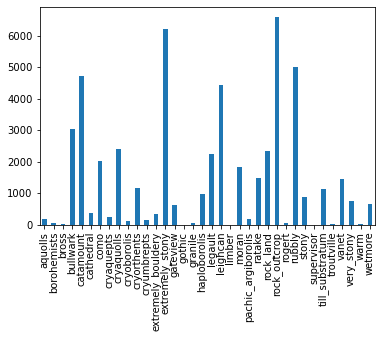

In [11]:
### ReExplore

soil_counts = trans_soil_df.sum(axis=0)
soil_counts.plot.bar()

print(soil_counts)

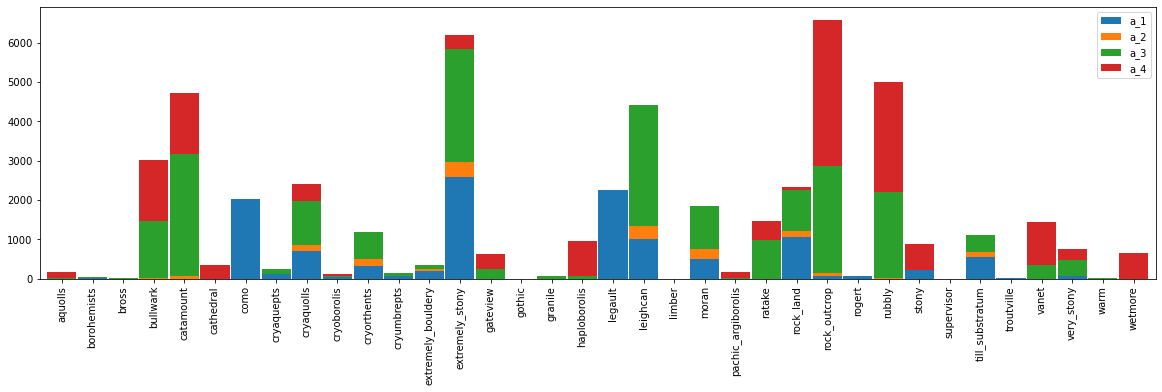

In [22]:
# soil_counts = trans_soil_df.loc[df_new["a_4"]==1].sum(axis=0)
# soil_counts.plot.bar()

soil_counts = pd.DataFrame()
for ii in ["a_1","a_2","a_3","a_4"]:
    soil_counts[ii] = trans_soil_df.loc[df_new[ii]==1].sum(axis=0)

soil_counts.plot(kind="bar",stacked=True , width = .95, figsize=(20,5))
plt.show()

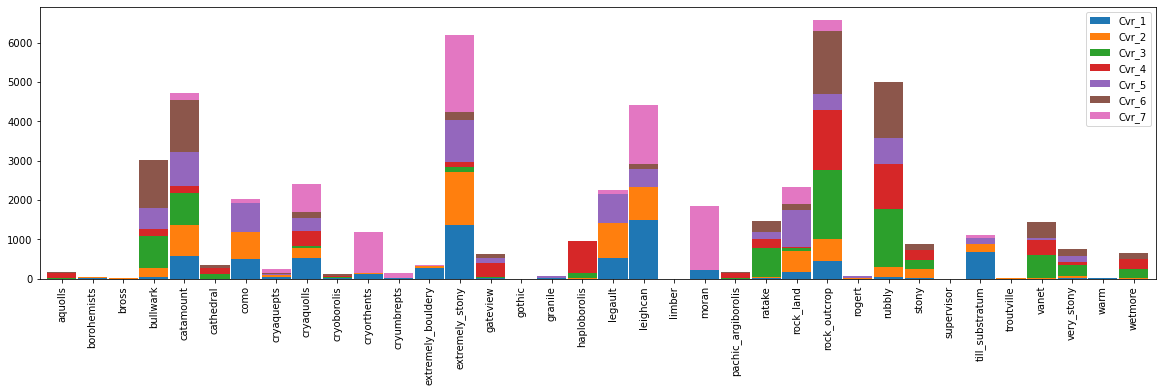

In [24]:
# for ii in range(7):
#     soil_counts = trans_soil_df.loc[df_new["cvr_typ"]==ii+1].sum(axis=0)
#     soil_counts.plot.bar()
#     plt.show()

soil_counts = pd.DataFrame()
for ii in range(7):
    soil_counts["Cvr_"+str(ii+1)] = trans_soil_df.loc[df_new["cvr_typ"]==ii+1].sum(axis=0)
    
soil_counts.plot(kind="bar",stacked=True , width = .95, figsize=(20,5))
plt.show()

* `pd.DataFrame.hist()` documentaiton
  * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
* `pd.DataFrame()` documentation
  * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
* `pd.Series()` documentation <-- This gets returned by some dataframe calls
  * https://pandas.pydata.org/pandas-docs/stable/reference/series.html
* Stack overflow on finding NA values in a dataframe
  * https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/26266451#26266451
* Numpy random number generator
  * https://numpy.org/doc/stable/reference/random/generator.html